In [6]:
%load_ext autoreload
%autoreload 2

from pathlib import Path

from hloc import (
    extract_features,
    match_features,
    reconstruction,
    visualization,
    pairs_from_retrieval,
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
images = Path("datasets/st_1/images/")

outputs = Path("outputs/st_1/sfm/")
sfm_pairs = outputs / "pairs-netvlad.txt"
sfm_dir = outputs / "st_1" / "sfm_superpoint+superglue"

retrieval_conf = extract_features.confs["netvlad"]
feature_conf = extract_features.confs["superpoint_max"]
matcher_conf = match_features.confs["superglue"]

In [9]:
retrieval_path = extract_features.main(retrieval_conf, images, outputs)
print(retrieval_path)
pairs_from_retrieval.main(retrieval_path, sfm_pairs, num_matched=5)

[2024/03/21 19:16:52 hloc INFO] Extracting local features with configuration:
{'model': {'name': 'netvlad'},
 'output': 'global-feats-netvlad',
 'preprocessing': {'resize_max': 1024}}
[2024/03/21 19:16:52 hloc INFO] Found 150 images in root datasets/st_1/images.
[2024/03/21 19:16:52 hloc INFO] Skipping the extraction.
[2024/03/21 19:16:52 hloc INFO] Extracting image pairs from a retrieval database.
[2024/03/21 19:16:52 hloc INFO] Found 750 pairs.


outputs/st_1/sfm/global-feats-netvlad.h5


In [10]:
feature_path = extract_features.main(feature_conf, images, outputs)
print(feature_path)
match_path = match_features.main(
    matcher_conf, sfm_pairs, feature_conf["output"], outputs
)
print(match_path)

[2024/03/21 19:16:57 hloc INFO] Extracting local features with configuration:
{'model': {'max_keypoints': 4096, 'name': 'superpoint', 'nms_radius': 3},
 'output': 'feats-superpoint-n4096-rmax1600',
 'preprocessing': {'grayscale': True, 'resize_force': True, 'resize_max': 1600}}
[2024/03/21 19:16:57 hloc INFO] Found 150 images in root datasets/st_1/images.
[2024/03/21 19:16:57 hloc INFO] Skipping the extraction.
[2024/03/21 19:16:57 hloc INFO] Matching local features with configuration:
{'model': {'name': 'superglue',
           'sinkhorn_iterations': 50,
           'weights': 'outdoor'},
 'output': 'matches-superglue'}
[2024/03/21 19:16:57 hloc INFO] Skipping the matching.


outputs/st_1/sfm/feats-superpoint-n4096-rmax1600.h5
outputs/st_1/sfm/feats-superpoint-n4096-rmax1600_matches-superglue_pairs-netvlad.h5


In [15]:
model = reconstruction.main(sfm_dir, images, sfm_pairs, feature_path, match_path)

[2024/03/21 19:57:11 hloc INFO] Creating an empty database...
[2024/03/21 19:57:11 hloc INFO] Importing images into the database...
[2024/03/21 19:57:12 hloc INFO] Importing features into the database...
100%|██████████| 150/150 [00:00<00:00, 3525.32it/s]
[2024/03/21 19:57:12 hloc INFO] Importing matches into the database...
100%|██████████| 750/750 [00:00<00:00, 4076.44it/s]
[2024/03/21 19:57:12 hloc INFO] Performing geometric verification of the matches...
I20240321 19:57:12.692490 456143 misc.cc:198] 
Custom feature matching
I20240321 19:57:12.694294 456143 feature_matching.cc:1021] Matching block [1/1]
I20240321 19:57:14.440086 456143 feature_matching.cc:46]  in 1.746s
I20240321 19:57:14.447036 456143 timer.cc:91] Elapsed time: 0.029 [minutes]
[2024/03/21 19:57:14 hloc INFO] Running 3D reconstruction...
I20240321 19:57:14.461285 456176 misc.cc:198] 
Loading database
I20240321 19:57:14.461799 456176 database_cache.cc:54] Loading cameras...
I20240321 19:57:14.461822 456176 database_c

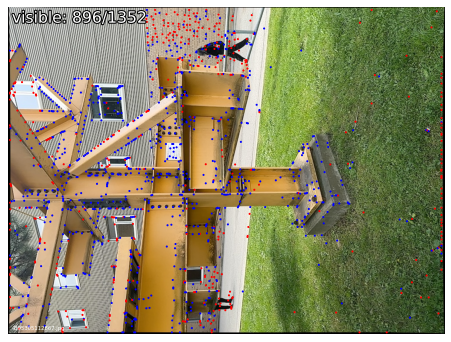

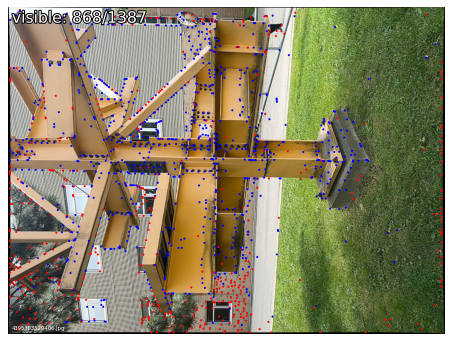

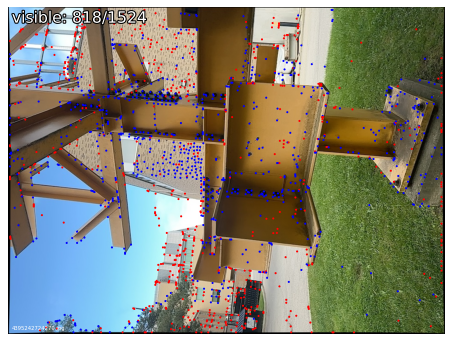

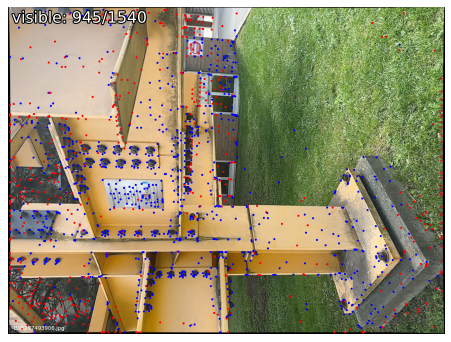

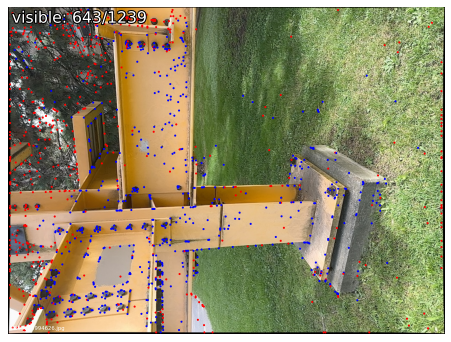

In [11]:
visualization.visualize_sfm_2d(model, images, color_by="visibility", n=5)

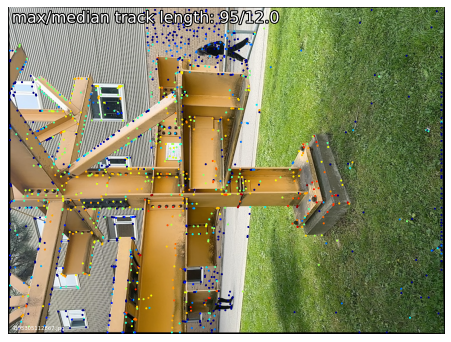

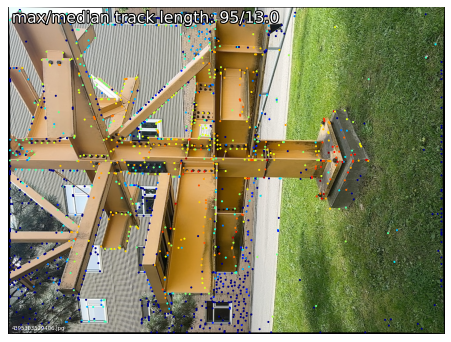

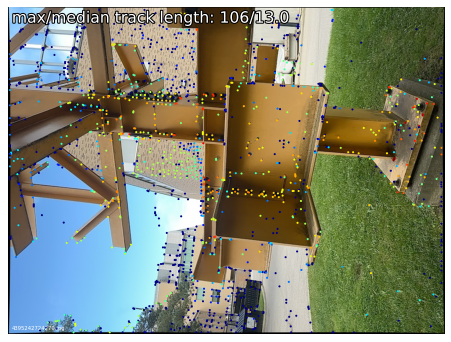

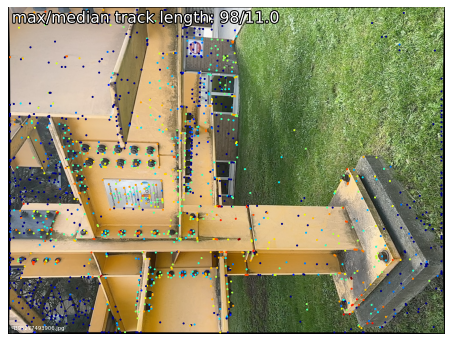

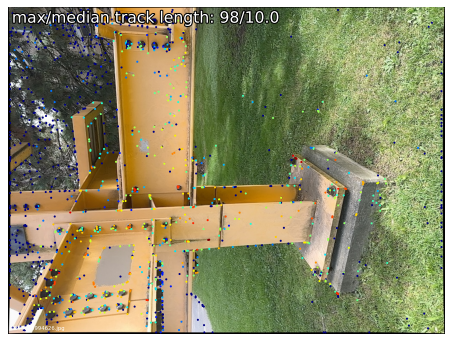

In [12]:
visualization.visualize_sfm_2d(model, images, color_by="track_length", n=5)

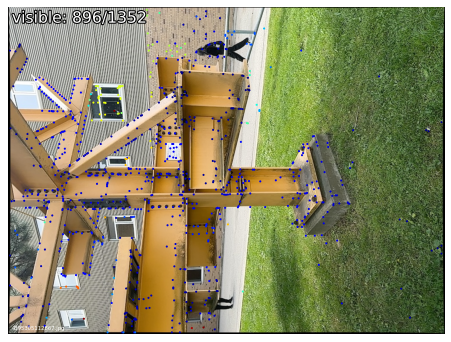

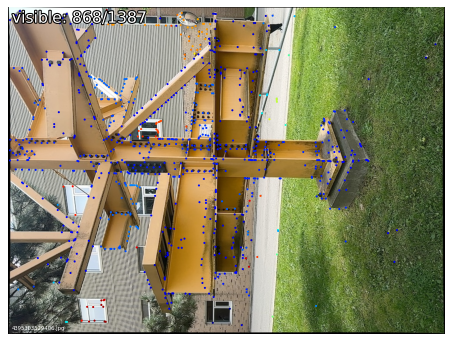

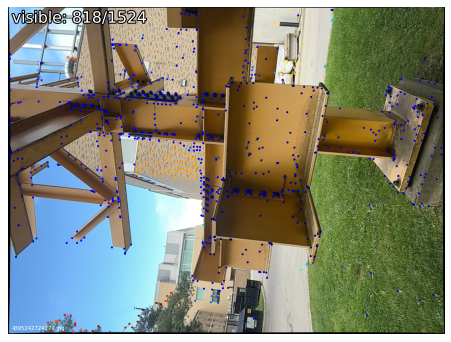

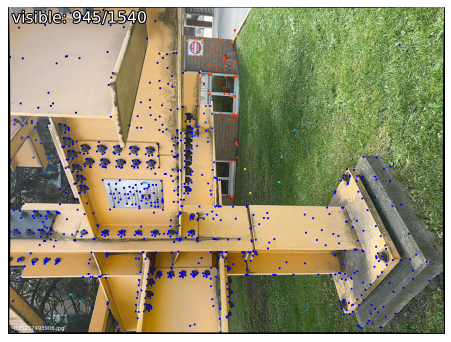

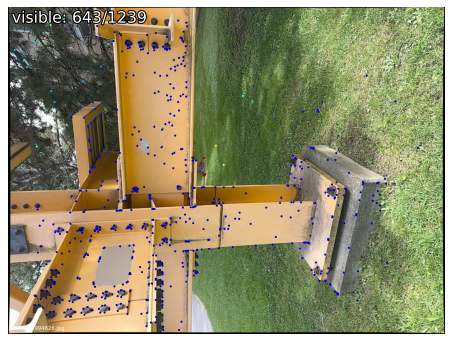

In [13]:
visualization.visualize_sfm_2d(model, images, color_by="depth", n=5)